In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv(r"D:\DSML class\Real world data assignments\Python\Netflix\netflix.csv.csv")

In [4]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Basic Analysis

### Observation of Data

In [7]:
df.shape

(8807, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## a. Unnesting

In [9]:
df['cast'] = df['cast'].str.split(',')
df['listed_in'] = df['listed_in'].str.split(',')
df['director'] = df['director'].str.split(',')

In [10]:
df = df.explode('cast', ignore_index = True)
df = df.explode('listed_in', ignore_index = True)
df = df.explode('director', ignore_index = True)

In [11]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
5,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
6,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
7,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
8,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
9,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."


## b. Handling Null Values

In [12]:
values = {'director': 'unknown_director', 'cast': 'unknown_cast', 'country': 'unknown_country', 'date_added': 'unknown_date_added', 'rating': 'unknown_rating', 'duration': 0}
df.fillna(value = values, inplace = True)
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
5,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
6,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
7,s2,TV Show,Blood & Water,unknown_director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
8,s2,TV Show,Blood & Water,unknown_director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
9,s2,TV Show,Blood & Water,unknown_director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."


## Question 1: Find the counts of each categorical variable both using graphical and nongraphical analysis.

### a. Non-ghraphical Analysis

In [13]:
type_count = df['type'].value_counts()

In [14]:
type_count

Movie      111989
TV Show     49227
Name: type, dtype: int64

### b. Ghraphical Analysis

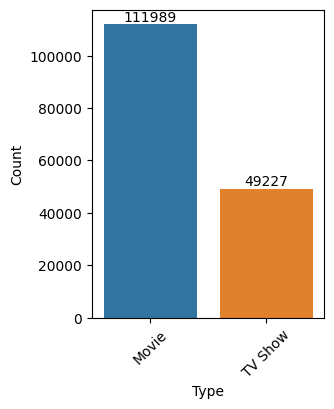

In [15]:
plt.figure(figsize=(3,4))
sns.countplot(x=df['type'])
plt.xticks(rotation=45)
ax=sns.countplot(data=df, x="type")
ax.bar_label(ax.containers[0])
ax.set(xlabel = 'Type', ylabel = 'Count')
plt.show()

### Insights
- The number of movies are higher than the number of TV Shows.
- Movies dominate the Netflix platform 100% more than the TV Shows.

## Question 2: Comparison of tv shows vs. movies.

### a. Top 10 countries with most movies produced

In [16]:
movies = df[(df['type'] == 'Movie') & (df['country'] != 'unknown_country')]
movies.groupby('country')['title'].nunique().sort_values(ascending = False).head(10)

country
United States     2058
India              893
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Japan               76
Name: title, dtype: int64

### b. Top 10 countries with most TV Shows produced

In [17]:
tvShows = df.loc[(df['type'] == 'TV Show') & (df['country'] != 'unknown_country')]
tvShows.groupby('country')['title'].nunique().sort_values(ascending = False).head(10)

country
United States     760
United Kingdom    213
Japan             169
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Australia          48
Spain              48
Name: title, dtype: int64

### Insights
- United States rank number one in the number of Movies and TV Shows produced around the world.
- India produces the second highest number of movies whereas United Kingdom in the TV Shows category. 
- Japan produces more TV Shows compared to Movies.

## Question 3: What is the best time to launch a TV show?

### Add release week column

In [18]:
date_data = df[df['date_added'] != 'unknown_date_added']

In [19]:
date_data['release_week'] = pd.to_datetime(date_data['date_added']).apply(lambda x: x.week)

C:\Users\shaje\AppData\Local\Temp\ipykernel_27476\167593795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_data['release_week'] = pd.to_datetime(date_data['date_added']).apply(lambda x: x.week)


### a. Best week to release Movies

In [20]:
dd_movies = date_data.loc[date_data['type'] == 'Movie']
dd_movies.groupby('release_week')['title'].nunique().sort_values(ascending = False).head(5)

release_week
1     316
44    243
40    215
9     207
26    195
Name: title, dtype: int64

### b. Best week to release TV Shows

In [21]:
dd_tv_show = date_data.loc[date_data['type'] == 'TV Show']
dd_tv_show.groupby('release_week')['title'].nunique().sort_values(ascending = False).head(5)

release_week
27    86
31    83
13    76
44    75
24    75
Name: title, dtype: int64

### Add release month column

In [22]:
date_data['release_month'] = pd.to_datetime(date_data['date_added']).apply(lambda x: x.month)

C:\Users\shaje\AppData\Local\Temp\ipykernel_27476\2004766752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_data['release_month'] = pd.to_datetime(date_data['date_added']).apply(lambda x: x.month)


### c. Best month to release Movies

In [23]:
dd_movies = date_data.loc[date_data['type'] == 'Movie']
dd_movies.groupby('release_month')['title'].nunique().sort_values(ascending = False)

release_month
7     565
4     550
12    547
1     546
10    545
3     529
8     519
9     519
11    498
6     492
5     439
2     382
Name: title, dtype: int64

### d. Best month to release TV Shows

In [24]:
dd_tvshows = date_data.loc[date_data['type'] == 'TV Show']
dd_tvshows.groupby('release_month')['title'].nunique().sort_values(ascending = False)

release_month
12    266
7     262
9     251
6     236
8     236
10    215
4     214
3     213
11    207
5     193
1     192
2     181
Name: title, dtype: int64

### Insights
- The best week to release Movies is week number 1 whereas best week for TV Show release is week number 27.
- The best month to release Movies is in July and for the TV Show release is December.

## Question 4: Analysis of actors/directors of different types of shows/movies.

### a. Top ten Actors in Movies or TV Shows

In [26]:
actor = df.loc[df['cast'] != 'unknown_cast']
actor.groupby('cast')['title'].nunique().sort_values(ascending = False).head(10)

cast
 Anupam Kher         39
 Rupa Bhimani        31
 Takahiro Sakurai    30
 Julie Tejwani       28
 Om Puri             27
Shah Rukh Khan       26
 Rajesh Kava         26
 Boman Irani         25
 Andrea Libman       25
 Yuki Kaji           25
Name: title, dtype: int64

### b. Top ten Directors in Movies or TV Shows

In [22]:
director = df.loc[df['director'] != 'unknown_director'][['director', 'title']]
director.groupby('director')['title'].nunique().sort_values(ascending = False).head(10)

director
Rajiv Chilaka          22
Raúl Campos            18
 Jan Suter             18
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Martin Scorsese        12
Youssef Chahine        12
Name: title, dtype: int64

### Insights
- Anupam Kher is the most appeared actor in the Movies/TV Shows.
- Rajiv Chilaka is the person who has directed the most number of Movies/TV Shows.

## Question 5: Which genre movies are more popular or produced more?

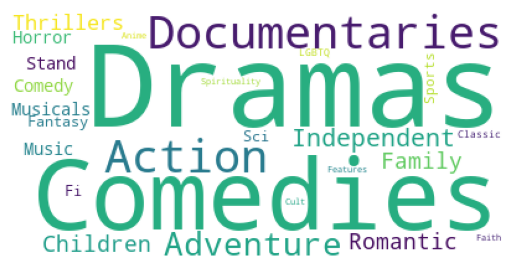

In [5]:
text = df.loc[df['type'] == 'Movie']['listed_in']
w = WordCloud()
stop_words = list(w.stopwords)
custom_stop_words = ['Movies', 'International']
stop_words = set(stop_words + custom_stop_words)
wordcloud = WordCloud(collocations = False, background_color = 'white', stopwords = stop_words).generate(' '.join(text.tolist()))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Insights
- The Drama genre movies are most popular
- The genres Comedies, Action and Adventure are also popular as well.


## Question 6: Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)

In [24]:
date_data['date_added_ts'] = pd.to_datetime(date_data['date_added'])
date_data['rel_add_diff'] = date_data['date_added_ts'] - pd.to_datetime(date_data['release_year'].apply(lambda x: '31-12-'+str(x)))
date_data['rel_add_diff'].mode()

C:\Users\shaje\AppData\Local\Temp\ipykernel_9652\986191081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_data['date_added_ts'] = pd.to_datetime(date_data['date_added'])
C:\Users\shaje\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31-12-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\shaje\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31-12-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\shaje\a

0   182 days
Name: rel_add_diff, dtype: timedelta64[ns]

### Insight 
- A movie is added to the Netflix platform, 182 days after it has been reeased.

# Overall Insights

1. Movies dominate the Netflix platform 100% more than TV Shows.
2. The United States ranks number one in the number of Movies and TV Shows produced around the world.
3. India produces the second highest number of movies whereas the United Kingdom in the TV Shows category.
4. Japan produces more TV Shows compared to Movies, hence TV Shows are more popular than movies in Japan.
5. The best week to release Movies and TV Shows is week number 1 and week number 27 respectively.
6. The best month to release Movies and TV Shows is in July and December respectively.
7. Anupam Kher is the most appeared actor in the Movies/TV Shows.
8. Rajiv Chilaka is the person who has directed the most Movies/TV Shows.
9. The Drama genre movies are most popular and Netflix should look forward to finding more movies in the genre Drama.
10. Next to Drama genres like Comedies, Action, and Adventure are also popular.
11. A movie is added to the Netflix platform, 182 days after it has been released.